In [1]:
from basic_utils import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = Net1(1, 30, 4)
f.load_state_dict(torch.load("simple_de1.pt"))
x_np = np.linspace(-3, 3, 100)
exact_y = x_np ** 2 + 1
X = torch.Tensor(x_np).unsqueeze(-1)
y_pred = f(X).detach().cpu().numpy()

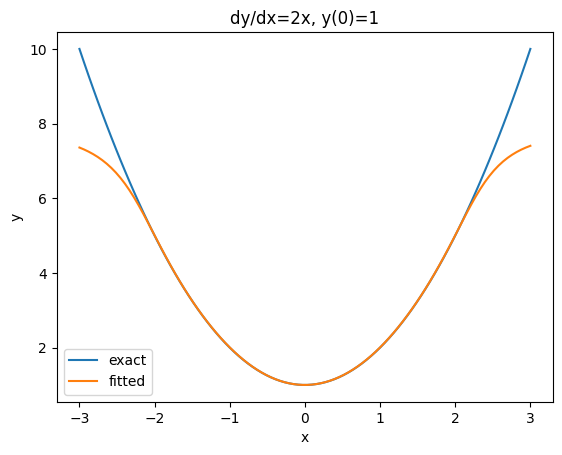

In [3]:
plt.plot(x_np, exact_y, label="exact")
plt.plot(x_np, y_pred, label="fitted")
plt.title("dy/dx=2x, y(0)=1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [4]:
f = Net1(1, 30, 4)
f.load_state_dict(torch.load("simple_de2.pt"))
x_np = np.linspace(-3, 3, 100)
exact_y = np.exp(x_np)
X = torch.Tensor(x_np).unsqueeze(-1)
y_pred = f(X).detach().cpu().numpy()

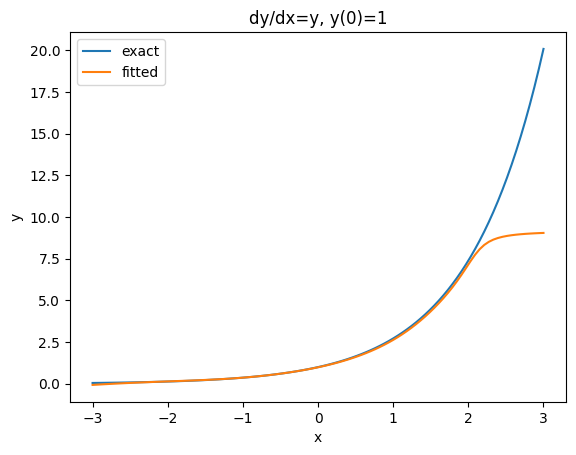

In [5]:
plt.plot(x_np, exact_y, label="exact")
plt.plot(x_np, y_pred, label="fitted")
plt.title("dy/dx=y, y(0)=1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [6]:
model = Net1(1, 30, 4, input_names=["x", "y"], model_name="T")
model.load_state_dict(torch.load("simple_de3.pt"))
x_np = np.linspace(0, 3, 100)
y_np = np.linspace(0, np.pi, 100)
X, Y = np.meshgrid(x_np, y_np)
print(X.shape)
print(Y.shape)
exact_Z = 2. / np.pi * np.arctan(np.sin(Y) / np.sinh(X))
X_tensor = torch.Tensor(np.array([X.reshape(-1), Y.reshape(-1)])).T
print(X_tensor.shape)
pred_Z = model(X_tensor).detach().cpu().numpy().reshape(100, 100)

(100, 100)
(100, 100)
torch.Size([10000, 2])


C:\Users\yunta\AppData\Local\Temp\ipykernel_22628\2848493402.py:8: RuntimeWarning: divide by zero encountered in divide
  exact_Z = 2. / np.pi * np.arctan(np.sin(Y) / np.sinh(X))
C:\Users\yunta\AppData\Local\Temp\ipykernel_22628\2848493402.py:8: RuntimeWarning: invalid value encountered in divide
  exact_Z = 2. / np.pi * np.arctan(np.sin(Y) / np.sinh(X))


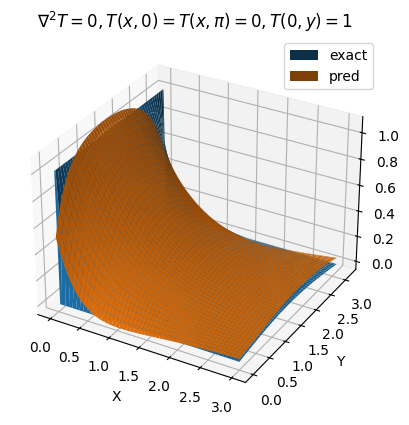

In [7]:
fig = plt.figure()

# Create a 3D axis
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, exact_Z, label="exact")
ax.plot_surface(X, Y, pred_Z, label="pred")

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("$\\nabla^2T=0, T(x,0)=T(x,\pi)=0, T(0,y)=1$")
ax.legend()

# Show the plot
plt.show()

In [8]:
model = Net1(1, 30, 4, input_names=["x", "y"], model_name="T")
model.load_state_dict(torch.load("simple_de3.pt"))
x_np = np.array([1])
y_np = np.linspace(0, np.pi, 100)
X, Y = np.meshgrid(x_np, y_np)
print(X.shape)
print(Y.shape)
exact_z = 2. / np.pi * np.arctan(np.sin(Y) / np.sinh(X))
print(exact_z.shape)
X_tensor = torch.Tensor(np.array([X.reshape(-1), Y.reshape(-1)])).T
print(X_tensor.shape)
z_pred = model(X_tensor).detach().cpu().numpy()
print(z_pred.shape)

(100, 1)
(100, 1)
(100, 1)
torch.Size([100, 2])
(100, 1)


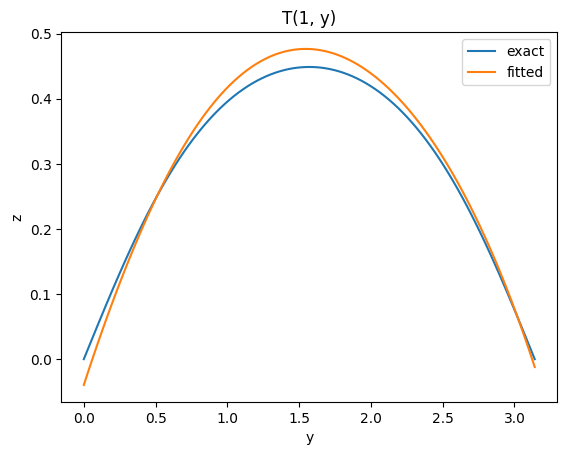

In [9]:
plt.plot(y_np, exact_z, label="exact")
plt.plot(y_np, z_pred, label="fitted")
plt.title("T(1, y)")
plt.xlabel("y")
plt.ylabel("z")
plt.legend()
plt.show()

In [10]:
model = Net1(1, 30, 4, input_names=["x", "y"], model_name="T")
model.load_state_dict(torch.load("simple_de3.pt"))
x_np = np.linspace(0, 3, 100)
y_np = np.array([1])
X, Y = np.meshgrid(x_np, y_np)
print(X.shape)
print(Y.shape)
exact_z = 2. / np.pi * np.arctan(np.sin(Y) / np.sinh(X))
print(exact_z.shape)
X_tensor = torch.Tensor(np.array([X.reshape(-1), Y.reshape(-1)])).T
print(X_tensor.shape)
z_pred = model(X_tensor).detach().cpu().numpy()
print(z_pred.shape)

(1, 100)
(1, 100)
(1, 100)
torch.Size([100, 2])
(100, 1)


C:\Users\yunta\AppData\Local\Temp\ipykernel_22628\3502439333.py:8: RuntimeWarning: divide by zero encountered in divide
  exact_z = 2. / np.pi * np.arctan(np.sin(Y) / np.sinh(X))


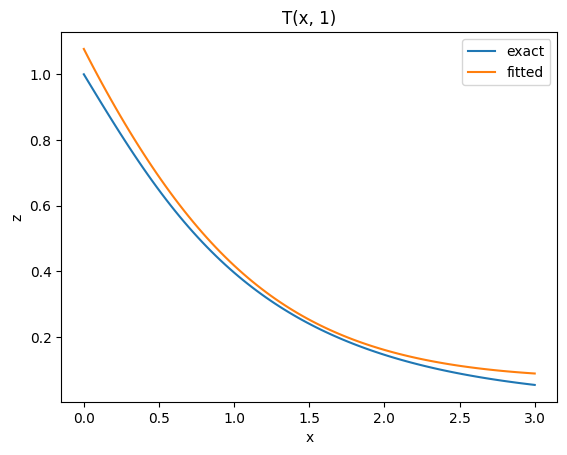

In [11]:
plt.plot(x_np.reshape(-1), exact_z.reshape(-1), label="exact")
plt.plot(x_np.reshape(-1), z_pred.reshape(-1), label="fitted")
plt.title("T(x, 1)")
plt.xlabel("x")
plt.ylabel("z")
plt.legend()
plt.show()